In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pandas import plotting
from pandas.plotting import parallel_coordinates

In [2]:
!pip install joypy

In [2]:
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import joypy

In [4]:
!pip install bubbly

  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5428 sha256=627bb24b036676b455f6dd8601944b1320a3744b304fda2cbbf0bb299b8f9f04
  Stored in directory: c:\users\balaji\appdata\local\pip\cache\wheels\b5\4a\53\7234ca75eea014cea6a7093adc822c77b40ba13de20c6f5d0a
Successfully built bubbly


In [20]:
!pip install plotly-express

In [3]:
from bubbly.bubbly import bubbleplot
import plotly_express as px

In [4]:
data = pd.read_csv('insurance_claims.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
data.shape

(1000, 40)

In [7]:
data.info

<bound method DataFrame.info of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-01-05           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_a

In [8]:
data.describe

<bound method NDFrame.describe of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-01-05           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy

In [9]:
data.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


In [10]:
#covariance of data
data.cov()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.325104e+04,970.201810,1.703130e+06,1.888144e+03,1.410315e+02,4.098745e+06,1.476998e+05,2.053193e+04,6.537987e+04,56.525149,1.728322,-0.959327,7.468871,1.887564e+05,3.670575e+04,1.940521e+04,1.326454e+05,-0.202464,NaN
age,9.702018e+02,83.544841,1.395997e+05,1.632352e+02,3.214568e+01,3.806326e+05,1.678029e+04,-1.802445e+03,1.892620e+03,5.538026,0.205834,-0.117534,0.531856,1.685908e+04,3.369297e+03,2.685543e+03,1.080424e+04,0.074430,NaN
policy_number,1.703130e+06,139599.665361,6.608139e+10,-1.059731e+06,1.416366e+06,5.296036e+09,1.305565e+08,7.023384e+07,-4.095652e+07,201.322010,3518.009337,-961.035852,-3617.161738,-1.222275e+08,-1.099333e+07,-1.324355e+07,-9.799063e+07,-282.988733,NaN
policy_deductable,1.888144e+03,163.235235,-1.059731e+06,3.743784e+05,-4.848613e+02,1.527928e+07,1.993895e+05,6.005009e+05,-4.048617e+05,259.175175,31.927928,-11.423423,45.313313,3.689501e+05,1.167917e+05,1.912697e+05,6.088869e+04,96.088088,NaN
policy_annual_premium,1.410315e+02,32.145675,1.416366e+06,-4.848613e+02,5.961772e+04,-3.504155e+06,5.664307e+05,-9.349637e+04,1.615803e+05,-2.678940,-11.441581,5.362622,0.632688,5.862176e+04,-2.101409e+04,-1.372875e+04,9.336460e+04,-72.306760,NaN
umbrella_limit,4.098745e+06,380632.632633,5.296036e+09,1.527928e+07,-3.504155e+06,5.278077e+12,3.240420e+09,-3.026763e+09,-1.553189e+09,-371415.415415,-49788.788789,42850.850851,-17204.204204,-2.447073e+09,-5.092246e+08,-2.637003e+08,-1.674148e+09,136733.733734,NaN
insured_zip,1.476998e+05,16780.292669,1.305565e+08,1.993895e+05,5.664307e+05,3.240420e+09,5.141121e+09,1.259612e+07,9.948976e+07,4124.025754,2005.227796,1687.420324,1578.175520,-6.412337e+07,-6.122698e+06,-2.366451e+06,-5.563422e+07,-14120.443708,NaN
capital-gains,2.053193e+04,-1802.445245,7.023384e+07,6.005009e+05,-9.349637e+04,-3.026763e+09,1.259612e+07,7.768588e+08,-3.674132e+07,-3178.586987,1750.552653,1276.184985,-546.757457,1.175952e+07,3.528093e+06,-1.047625e+05,8.336193e+06,5264.676376,NaN
capital-loss,6.537987e+04,1892.620220,-4.095652e+07,-4.048617e+05,1.615803e+05,-1.553189e+09,9.948976e+07,-3.674132e+07,7.898403e+08,-4894.551752,-426.512212,-562.812412,-1290.858959,-2.675643e+07,-6.318256e+06,-3.100158e+06,-1.733802e+07,-9571.920821,NaN
incident_hour_of_the_day,5.652515e+01,5.538026,2.013220e+02,2.591752e+02,-2.678940e+00,-3.714154e+05,4.124026e+03,-3.178587e+03,-4.894552e+03,48.321586,0.855540,-0.197045,0.050422,3.995424e+04,5.624392e+03,6.021358e+03,2.830849e+04,0.893562,NaN


In [11]:
data.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [12]:
data = data.replace('?',np.NaN)

In [13]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [14]:
#replacing the missing values
data['collision_type'].fillna(data['collision_type'].mode()[0],inplace=True)
data['property_damage'].fillna('NO',inplace=True)
data['police_report_available'].fillna('NO',inplace=True)

In [15]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [16]:
fig = px.scatter(data, x = 'total_claim_amount', y = 'policy_annual_premium', color = 'insured_sex',
                marginal_x = 'rug', marginal_y = 'histogram')
fig.show()

In [17]:
fig = px.scatter_matrix(data,dimensions=["injury_claim", "property_claim", "vehicle_claim"],color="insured_sex")
fig.show()

In [18]:
fig = px.parallel_categories(data,color="total_claim_amount",color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [19]:
fraud = data['fraud_reported'].value_counts()
label_fraud = fraud.index
size_fraud = fraud.values
colors=['red','blue']
trace = go.Pie(labels=label_fraud,values=size_fraud,marker=dict(colors=colors),name='holes',hole=0.3)
df =[trace]
layout = go.Layout(title='Distribution of frauds')
fig = go.Figure(data=df,layout=layout)
py.iplot(fig)

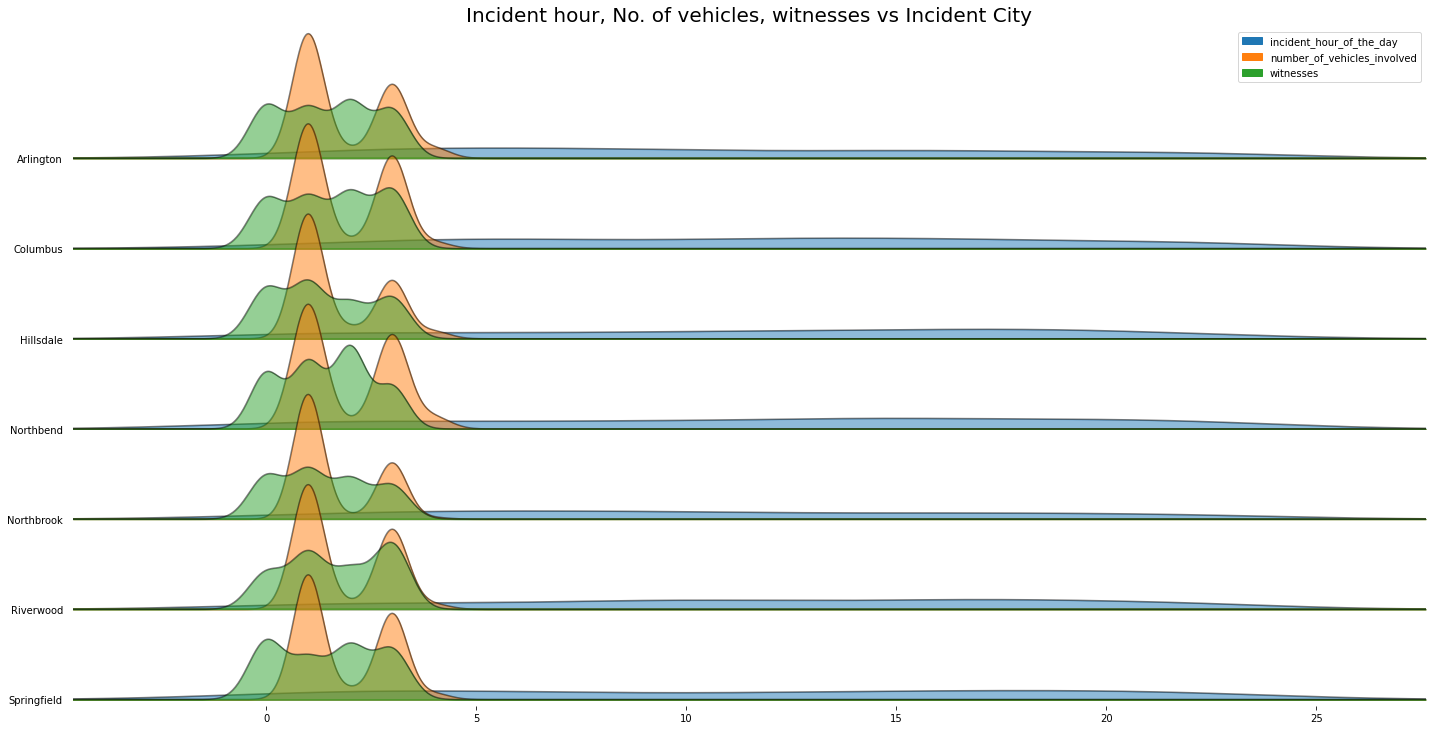

In [20]:
fig,axes = joypy.joyplot(data,column=['incident_hour_of_the_day','number_of_vehicles_involved', 'witnesses'],
                         by = 'incident_city',ylim='own',figsize=(20,10),alpha=0.5,legend=True)
plt.title('Incident hour, No. of vehicles, witnesses vs Incident City', fontsize = 20)
plt.show()

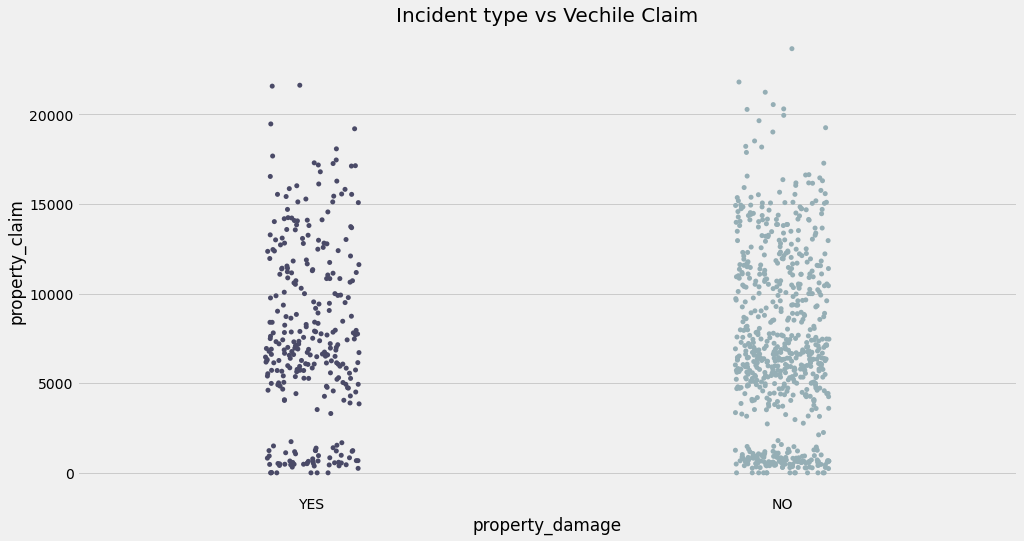

In [21]:
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,8)
sns.stripplot(data['property_damage'],data['property_claim'],palette='bone')
plt.title("Incident type vs Vechile Claim",fontsize=20)
plt.show()

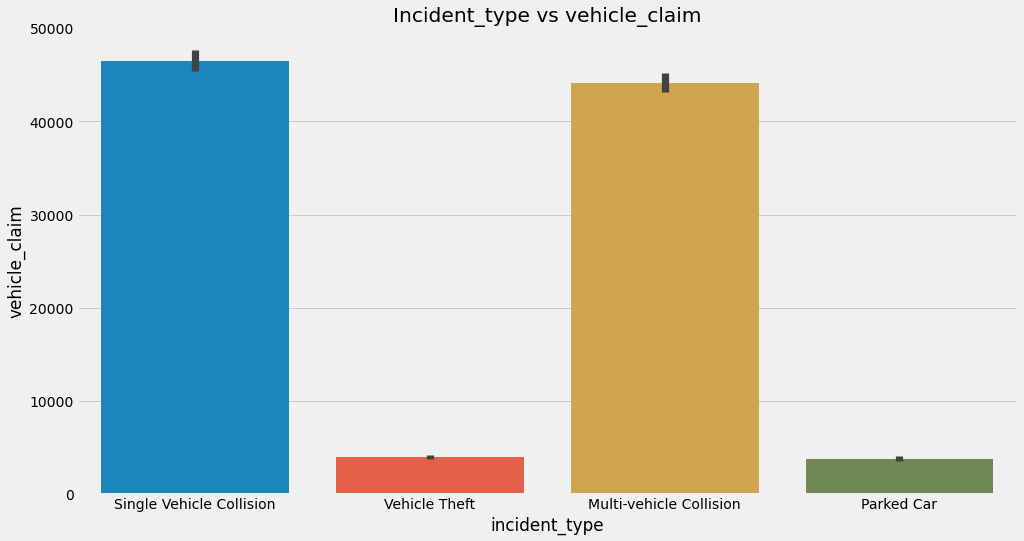

In [22]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,8)
sns.barplot(x=data['incident_type'],y=data['vehicle_claim'])
plt.title("Incident_type vs vehicle_claim")
plt.show()

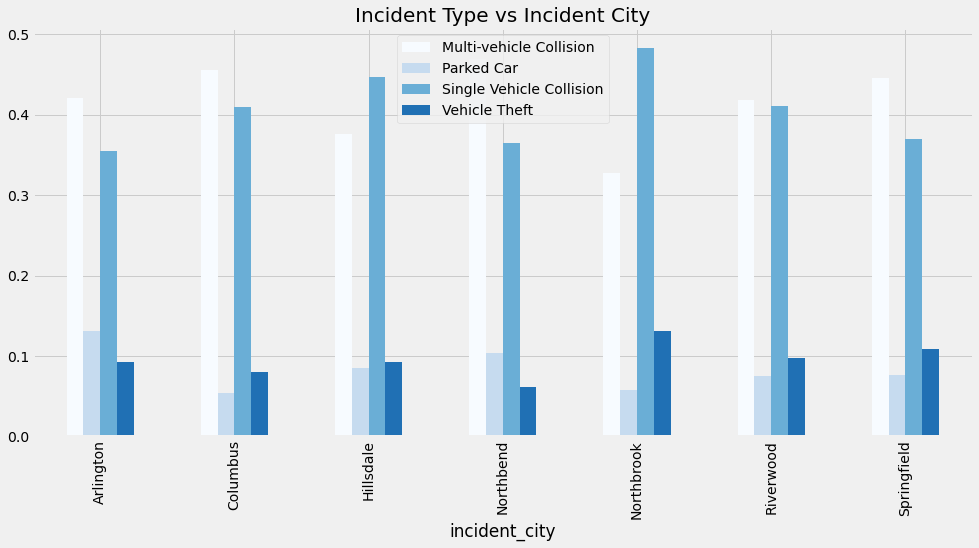

In [23]:
incident = pd.crosstab(data['incident_city'], data['incident_type'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Incident City', fontsize = 20)
plt.legend()
plt.show()

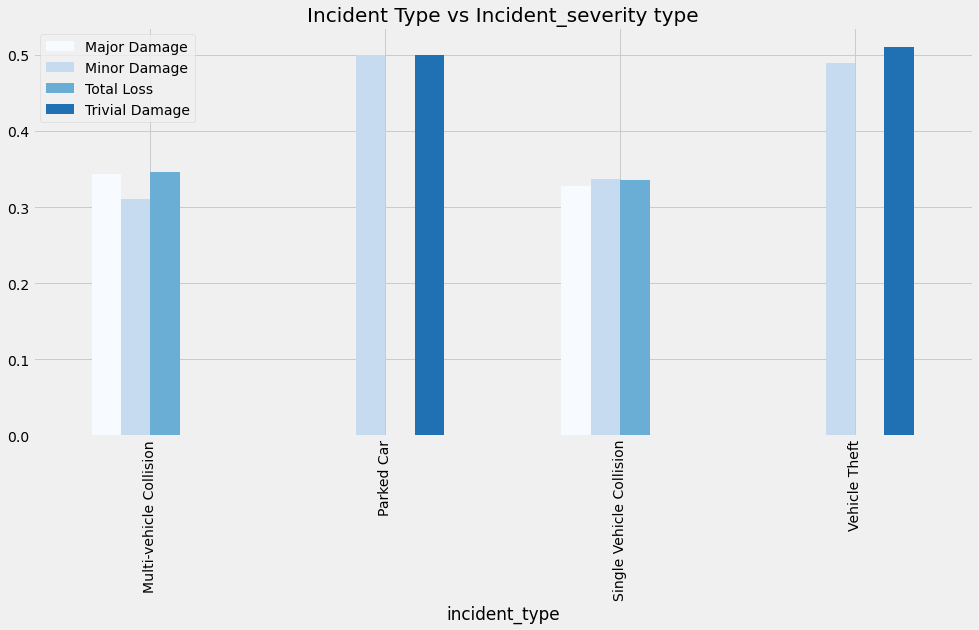

In [24]:
incident = pd.crosstab(data['incident_type'], data['incident_severity'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Incident_severity type', fontsize = 20)
plt.legend()
plt.show()

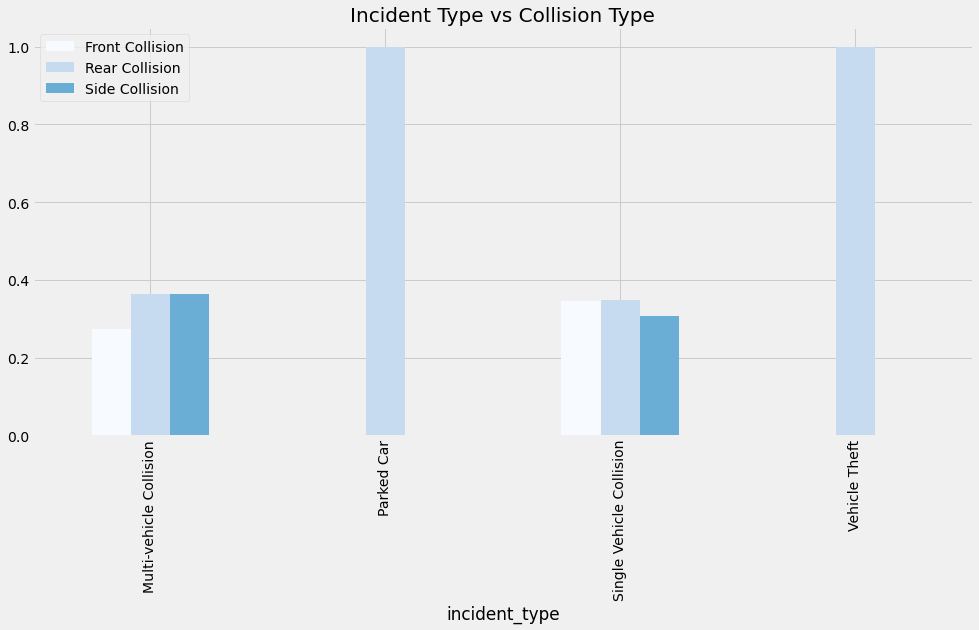

In [25]:
incident = pd.crosstab(data['incident_type'], data['collision_type'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

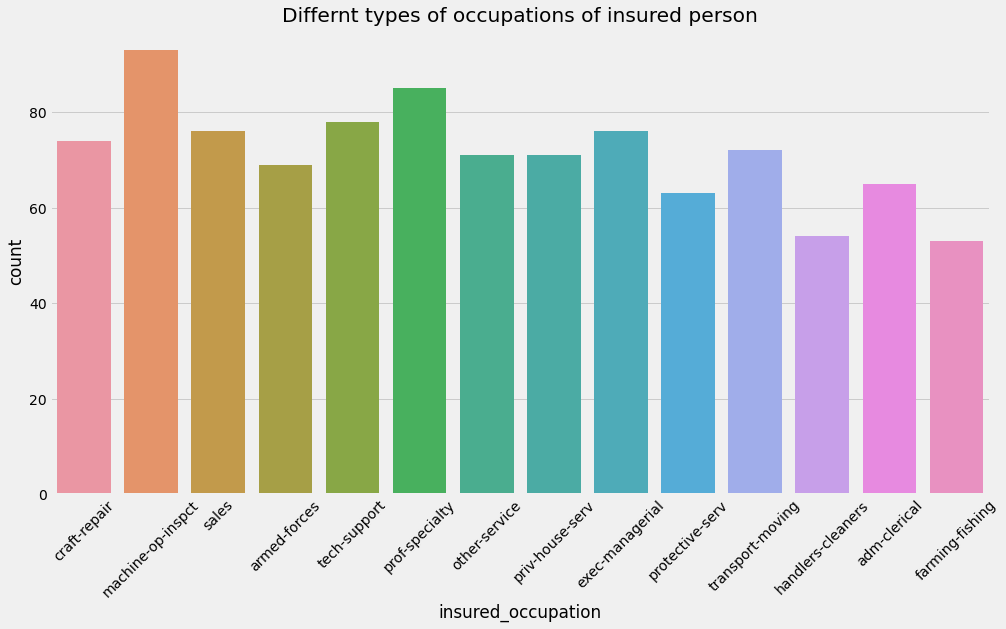

In [26]:
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = (15,8)
sns.countplot(x=data['insured_occupation'])
plt.title("Differnt types of occupations of insured person")
plt.xticks(rotation=45)
plt.show()

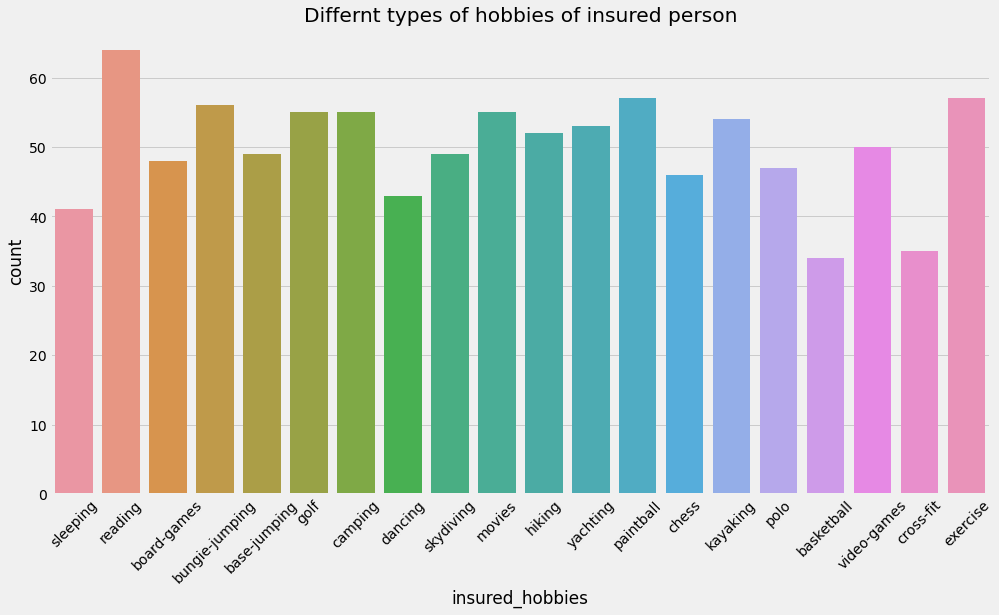

In [27]:
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = (15,8)
sns.countplot(x=data['insured_hobbies'])
plt.title("Differnt types of hobbies of insured person")
plt.xticks(rotation=45)
plt.show()

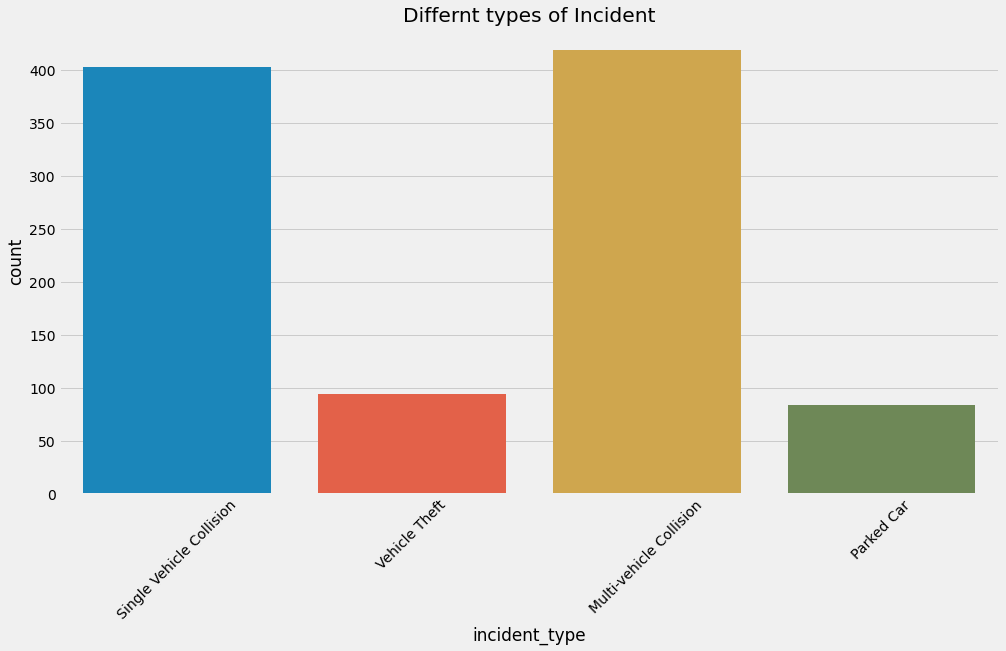

In [28]:
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = (15,8)
sns.countplot(x=data['incident_type'])
plt.title("Differnt types of Incident")
plt.xticks(rotation=45)
plt.show()

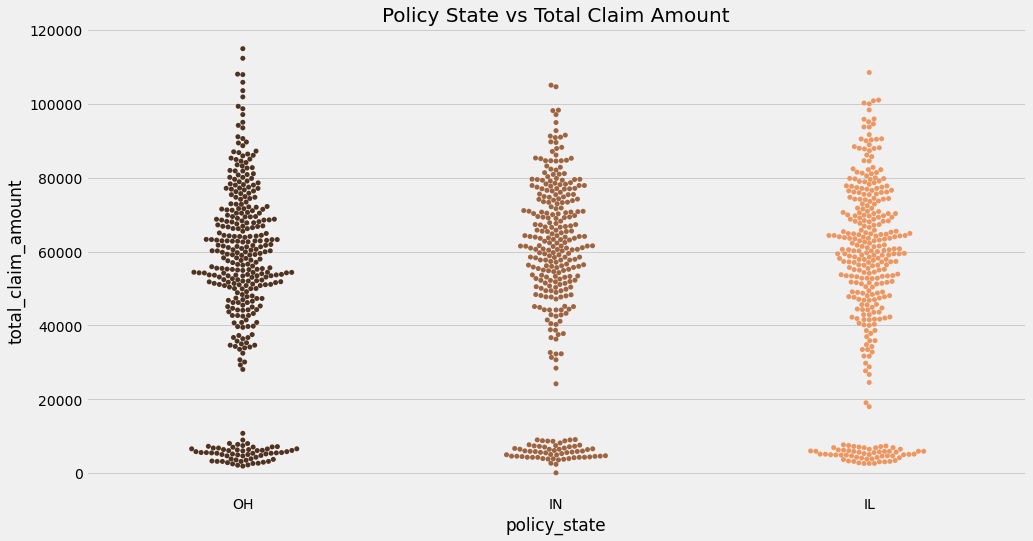

In [29]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.swarmplot(data['policy_state'], data['total_claim_amount'], palette = 'copper')
plt.title('Policy State vs Total Claim Amount', fontsize = 20)
plt.show()

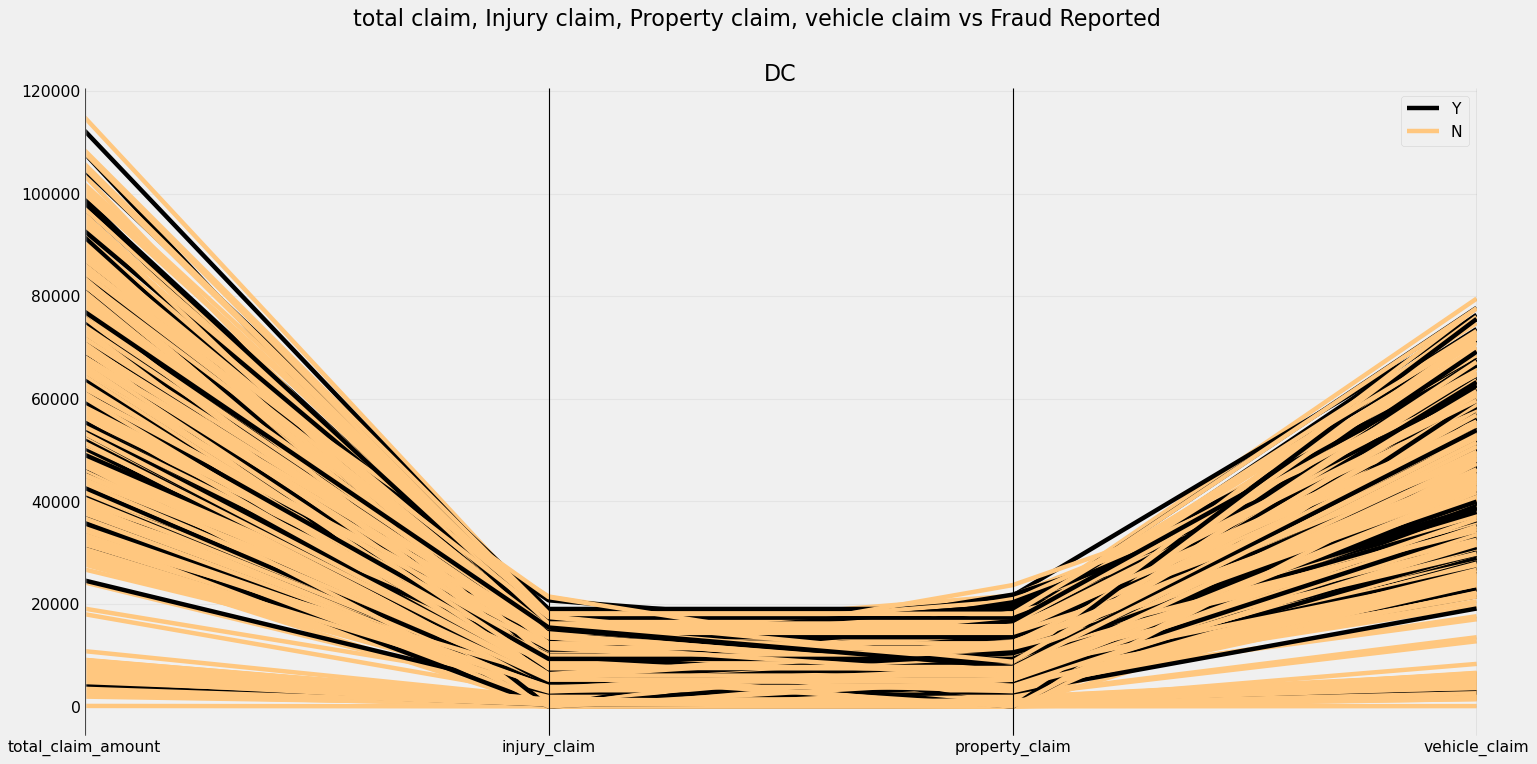

In [30]:
plt.figure(figsize=(20, 10), dpi= 80)

parallel_coordinates(data[['total_claim_amount','injury_claim', 'property_claim','vehicle_claim','fraud_reported']],
                     'fraud_reported',  colormap = 'copper')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('DC', fontsize = 20)
plt.grid(alpha=0.3)


plt.suptitle('total claim, Injury claim, Property claim, vehicle claim vs Fraud Reported', fontsize = 20)
plt.show()

In [31]:
trace = go.Histogram(
          x = data['insured_education_level'],
          name = 'Marvel',
          opacity = 0.75,
          marker = dict(
                 color = 'rgb(195, 195, 145, 0.5)'
          )
)
df = [trace]

layout = go.Layout(
    title = 'Education Level of the Customers')

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [32]:

trace = go.Histogram(
          x = data['insured_occupation'],
          name = 'Marvel',
          opacity = 0.75,
          marker = dict(
                 color = 'rgb(15, 255, 185, 0.5)'
          )
)
df = [trace]

layout = go.Layout(
    title = 'Occupation Level of the Customers')

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [33]:
sex = data['insured_sex'].value_counts()
relationship = data['insured_relationship'].value_counts()

label_sex = sex.index
value_sex = sex.values

label_relationship = relationship.index
value_relationship = relationship.values

color = ['gold','silver']

trace = go.Pie(labels=label_sex,values=value_sex,marker=dict(colors=color),name='Gender',hole=0.4)


colors2 = ['pink', 'lightblue','lightgreen','grey','red']

trace2 = go.Pie(labels=label_relationship,values=value_relationship,marker=dict(colors=colors2),name='Relationship',hole=0.4)

df = [trace]
df2 = [trace2]

layout1 = go.Layout(
           title = 'Gender of the Customers')
layout2 = go.Layout(
           title = 'Relationship')

fig = go.Figure(data=df,layout=layout1)
fig2 = go.Figure(data=df2,layout=layout2)
py.iplot(fig)
py.iplot(fig2)

In [34]:
trace = go.Violin(x=data['insured_sex'],y=data['insured_zip'],name='Gender vs Insured zip',opacity=0.75,
                  marker = dict(color = 'rgb(215, 5, 185, 0.5)'))
df = [trace]
layout = go.Layout(title='Gender vs Insured zip')
fig = go.Figure(data=df,layout=layout)
py.iplot(fig)

In [36]:
trace = go.Box(x=data['auto_make'],y=data['vehicle_claim'],opacity=0.7,marker=dict(color='rgb(125,195,5,0.5)'))
df = [trace]
layout = go.Layout(title="Automobile vs vechile claim")
fig = go.Figure(data=df,layout=layout)
py.iplot(fig)

In [38]:
trace = go.Histogram(x=data['policy_annual_premium'],marker=dict(color='rgb(100, 75, 25, 0.5)'))
df = [trace]
layout = go.Layout(title='Distribution of Annual Policy among the Customers')
scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Count')
        )
fig = go.Figure(data = df, layout = layout)
py.iplot(fig)    

In [39]:
trace = go.Histogram(
          x = data['age'],
          
          #fill = 'tozeroy',
          marker = dict(
                 color = 'rgb(215, 245, 5, 0.5)'
          )
)
df = [trace]

layout = go.Layout(
    title = 'Distribution of Age among the Customers',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Count')
        ))

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [40]:
trace = go.Scatter3d(x=data['age'],y=data['property_claim'],z=data['vehicle_claim'],mode='markers',marker=dict(
         size = 10,
         color = data['age']
    ))
df = [trace]
layout = go.Layout(title='Cholestrol vs Heart Rate vs Age',margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Property_claim'),
            zaxis = dict(title  = 'Vehicle_claim')
        )
        )
fig = go.Figure(data = df, layout=layout)
py.iplot(fig)


In [41]:
#Data preprocess
# let's extrat days, month and year from policy bind date

data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'], errors = 'coerce')

In [42]:
# let's encode the fraud report to numerical values

data['fraud_reported'] = data['fraud_reported'].replace(('Y','N'),(0,1))

In [43]:
# let's check the correlation of authorities_contacted with the target

data[['auto_model','fraud_reported']].groupby(['auto_model'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_model,fraud_reported
0,3 Series,0.944444
31,RSX,0.916667
25,Malibu,0.900000
36,Wrangler,0.880952
29,Pathfinder,0.870968
35,Ultima,0.869565
9,Camry,0.857143
11,Corolla,0.850000
8,CRV,0.850000
21,Legacy,0.843750


In [44]:
# let's perform target encoding for auto make

data['auto_make'] = data['auto_make'].replace(('3 Series','RSX','Malibu','Wrangler','Pathfinder','Ultima','Camry',
                'Corolla','CRV','Legacy','Neon','95','TL','93','MDX','Accord','Grand Cherokee','Escape','E4000',
            'A3','Highlander','Passat','92x','Jetta','Fusion','Forrestor','Maxima','Impreza','X5','RAM','M5','A5',
                'Civic','F150','Tahaoe','C300','ML350','Silverado','X6'),
                (0.95,0.91, 0.90,0.88,0.87,0.86,0.855,0.85,0.85,0.84,0.83,0.81,0.80,0.80,0.78,0.77,0.76,0.75,0.74,
                 0.73,0.72,0.72,0.71,0.71,0.71,0.71,0.70,0.70,0.69,0.67,0.66,0.65,0.64,0.63,0.62,0.61,0.60,0.59,0.56))

In [45]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,0,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NO,5070,780,780,3510,Mercedes,E400,2007,0,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,1,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,0,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,1,NaN


In [46]:
# let's check the correlation auto make with the target

data[['auto_make','fraud_reported']].groupby(['auto_make'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_make,fraud_reported
7,Jeep,0.835821
9,Nissan,0.820513
12,Toyota,0.814286
0,Accura,0.808824
10,Saab,0.775000
11,Suburu,0.762500
4,Dodge,0.750000
6,Honda,0.745455
3,Chevrolet,0.723684
2,BMW,0.722222


In [47]:
# let's perform target encoding for auto make

data['auto_make'] = data['auto_make'].replace(('Jeep','Nissan','Toyota','Accura','Saab','Suburu',
                                'Dodge','Honda','Chevrolet','BMW','Volkswagen','Audi','Ford','Mercedes'),
                                              (0.84,0.82,0.81,0.80,0.77,0.76,0.75,0.74,0.73,0.72,0.71,0.69,0.69,0.66))

In [48]:
data['auto_make'].value_counts()

0.69    141
0.77     80
0.76     80
0.75     80
0.82     78
0.73     76
0.72     72
0.81     70
0.80     68
0.71     68
0.84     67
0.66     65
0.74     55
Name: auto_make, dtype: int64

In [49]:
# let's check the correlation of authorities_contacted with the target

data[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,police_report_available,fraud_reported
1,YES,0.770701
0,NO,0.744898


In [50]:
# let's perform target encoding for property damage

data['police_report_available'] = data['police_report_available'].replace(('NO','YES'),(0.77,0.74))

In [51]:
 data['police_report_available'].value_counts()

0.77    686
0.74    314
Name: police_report_available, dtype: int64

In [52]:
# let's check the correlation of authorities_contacted with the target

data[['property_damage','fraud_reported']].groupby(['property_damage'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,property_damage,fraud_reported
0,NO,0.757880
1,YES,0.741722


In [53]:
# let's perform target encoding for property damage

data['property_damage'] = data['property_damage'].replace(('NO','YES'),(0.76,0.74))

In [54]:
data['property_damage'].value_counts()

0.76    698
0.74    302
Name: property_damage, dtype: int64

In [55]:
# let's check the correlation of authorities_contacted with the target

data[['incident_city','fraud_reported']].groupby(['incident_city'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_city,fraud_reported
4,Northbrook,0.778689
5,Riverwood,0.776119
3,Northbend,0.765517
6,Springfield,0.757962
2,Hillsdale,0.751773
1,Columbus,0.738255
0,Arlington,0.710526


In [56]:
# let's do target encoding for incident city

data['incident_city'] = data['incident_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0.78,0.77,0.76,0.75,0.74,0.73,0.71))

In [57]:
data['incident_city'].value_counts()

0.75    157
0.71    152
0.73    149
0.76    145
0.74    141
0.77    134
0.78    122
Name: incident_city, dtype: int64

In [58]:
# let's check the correlation of authorities_contacted with the target

data[['incident_state','fraud_reported']].groupby(['incident_state'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_state,fraud_reported
6,WV,0.820276
1,NY,0.778626
5,VA,0.772727
3,PA,0.733333
4,SC,0.705645
0,NC,0.690909
2,OH,0.565217


In [59]:
# let's perform target encoding for incident state

data['incident_state'] = data['incident_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0.82,0.77,0.76,0.73,0.70,0.69,0.56))

In [60]:
data['incident_state'].value_counts()

0.77    262
0.70    248
0.82    217
0.69    110
0.76    110
0.73     30
0.56     23
Name: incident_state, dtype: int64

In [61]:
# let's check the correlation of authorities_contacted with the target

data[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,authorities_contacted,fraud_reported
2,None,0.934066
4,Police,0.791096
1,Fire,0.730942
0,Ambulance,0.709184
3,Other,0.681818


In [62]:
# let's perform target encoding for authorities contacted

data['authorities_contacted'] = data['authorities_contacted'].replace(('None','Police','Fire','Ambulance','Other'),
                                                                      (0.94,0.79,0.73,0.70,0.68))

In [64]:
data['authorities_contacted'].value_counts()

0.79    292
0.73    223
0.68    198
0.70    196
0.94     91
Name: authorities_contacted, dtype: int64

In [65]:
# let's check the correlation of incident_severity with the target

data[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_severity,fraud_reported
3,Trivial Damage,0.933333
1,Minor Damage,0.892655
2,Total Loss,0.871429
0,Major Damage,0.394928


In [66]:
# let's perform target encoding for incident severity

data['incident_severity'] = data['incident_severity'].replace(('Trivial Damage','Minor Damage','Total Loss',
                                                              'Major Damage'),(0.94,0.89,0.87,0.39))

In [67]:
data['incident_severity'].value_counts()

0.89    354
0.87    280
0.39    276
0.94     90
Name: incident_severity, dtype: int64

In [68]:
# let's check the correlation of collision_type with the target

data[['collision_type','fraud_reported']].groupby(['collision_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,collision_type,fraud_reported
1,Rear Collision,0.772340
2,Side Collision,0.746377
0,Front Collision,0.724409


In [69]:
# let's perform target encoding for collision type

data['collision_type'] = data['collision_type'].replace(('Rear Collision', 'Side Collision', 'Front Collision'),
                                                        (0.78,0.74,0.72))

In [70]:
data['collision_type'].value_counts()

0.78    470
0.74    276
0.72    254
Name: collision_type, dtype: int64

In [71]:
# let's check the correlation of incident_type with the target

data[['incident_type','fraud_reported']].groupby(['incident_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_type,fraud_reported
3,Vehicle Theft,0.914894
1,Parked Car,0.904762
0,Multi-vehicle Collision,0.727924
2,Single Vehicle Collision,0.709677


In [72]:
# let's perform target encoing for incident type

data['incident_type'] = data['incident_type'].replace(('Vehicle Theft','Parked Car','Multi-vehicle Collision',
                                'Single Vehicle Collision'),(0.91, 0.90, 0.72,0.70))

In [73]:
data['incident_type'].value_counts()

0.72    419
0.70    403
0.91     94
0.90     84
Name: incident_type, dtype: int64

In [74]:
data['incident_date'] = pd.to_datetime(data['incident_date'], errors = 'coerce')

# extracting days and month from date
data['incident_month'] = data['incident_date'].dt.month
data['incident_day'] = data['incident_date'].dt.day

In [75]:
# let's know the relation between insured_relationship and fraud reported

data[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_relationship,fraud_reported
0,husband,0.794118
3,own-child,0.786885
4,unmarried,0.758865
1,not-in-family,0.741379
5,wife,0.729032
2,other-relative,0.706215


In [76]:
# let's do target encoding for insured relationship

data['insured_relationship'] = data['insured_relationship'].replace(('husband','own-child','unmarried',
                                        'not-in-family','wife','other-relative'),(0.79,0.78,0.75,0.74,0.72,0.70))


In [78]:
data['insured_relationship'].value_counts()

0.78    183
0.70    177
0.74    174
0.79    170
0.72    155
0.75    141
Name: insured_relationship, dtype: int64

In [79]:
# let's know the relation between insured_hobbies and fraud reported

data[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_hobbies,fraud_reported
4,camping,0.909091
11,kayaking,0.907407
9,golf,0.890909
7,dancing,0.883721
3,bungie-jumping,0.839286
12,movies,0.836364
1,basketball,0.823529
8,exercise,0.807018
17,sleeping,0.804878
18,video-games,0.800000


In [80]:
# let's perform target encoding for insured_hobbies

data['insured_hobbies'] = data['insured_hobbies'].replace(('camping', 'kayaking', 'golf','dancing',
        'bungie-jumping','movies', 'basketball','exercise','sleeping','video-games','skydiving','paintball',
            'hiking','base-jumping','reading','polo','board-games','yachting', 'cross-fit','chess'),(0.91, 0.90,
                0.89, 0.88,0.84,0.83,0.82,0.81,0.805,0.80,0.78,0.77,0.76,0.73,0.73,0.72,0.70,0.69,0.25,0.17))

In [81]:
data['insured_hobbies'].value_counts()

0.730    113
0.770     57
0.810     57
0.840     56
0.890     55
0.910     55
0.830     55
0.900     54
0.690     53
0.760     52
0.800     50
0.780     49
0.700     48
0.720     47
0.170     46
0.880     43
0.805     41
0.250     35
0.820     34
Name: insured_hobbies, dtype: int64

In [82]:
# let's know the relation between insured_occupation and fraud reported

data[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_occupation,fraud_reported
7,other-service,0.830986
8,priv-house-serv,0.830986
0,adm-clerical,0.830769
5,handlers-cleaners,0.796296
9,prof-specialty,0.788235
10,protective-serv,0.777778
6,machine-op-inspct,0.763441
1,armed-forces,0.753623
11,sales,0.723684
12,tech-support,0.717949


In [83]:
# let's perform target encoding for insured_occupation

data['insured_occupation'] = data['insured_occupation'].replace(('other-service','priv-house-serv',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0.84, 0.84,0.83, 0.79,0.78,0.77,0.76,0.75,0.72,0.71,
                                                          0.705,0.70,0.69,0.63))

In [84]:
data['insured_occupation'].value_counts()

0.840    142
0.760     93
0.780     85
0.710     78
0.630     76
0.720     76
0.700     74
0.705     72
0.750     69
0.830     65
0.770     63
0.790     54
0.690     53
Name: insured_occupation, dtype: int64

In [85]:
# let's know the relation of insured_education_level with faud_reported

data[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_education_level,fraud_reported
5,Masters,0.776224
2,High School,0.775000
0,Associate,0.765517
3,JD,0.739130
1,College,0.737705
4,MD,0.736111
6,PhD,0.736000


In [86]:
# let's perform target encoding

data['insured_education_level'] = data['insured_education_level'].replace(('Masters', 'High School','Associate',
                                        'JD','College', 'MD','PhD'),(0.78,0.77,0.76,0.74,0.73,0.72,0.71))

In [87]:
data['insured_education_level'].value_counts()

0.74    161
0.77    160
0.76    145
0.72    144
0.78    143
0.71    125
0.73    122
Name: insured_education_level, dtype: int64

In [88]:
# lets know the relation of insured sex and fraud reported

data[['insured_sex','fraud_reported']].groupby(['insured_sex'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,insured_sex,fraud_reported
0,FEMALE,0.765363
1,MALE,0.738661


In [89]:
# target encoding for sex

data['insured_sex'] = data['insured_sex'].replace(('FEMALE','MALE'),(0.76,0.73))

In [90]:
data['insured_sex'].value_counts()

0.76    537
0.73    463
Name: insured_sex, dtype: int64

In [91]:
# lets know the relation of policy state and fraud reported

data[['policy_csl','fraud_reported']].groupby(['policy_csl'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_csl,fraud_reported
2,500/1000,0.783333
0,100/300,0.742120
1,250/500,0.737892


In [92]:
# target encoding for policy_csl

data['policy_csl'] = data['policy_csl'].replace(('500/1000','100/300','250/500'),(0.78,0.74,0.73))

In [93]:
data['policy_csl'].value_counts()

0.73    351
0.74    349
0.78    300
Name: policy_csl, dtype: int64

In [94]:
# lets know the relation of policy state and fraud reported

data[['policy_state','fraud_reported']].groupby(['policy_state'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_state,fraud_reported
0,IL,0.772189
1,IN,0.745161
2,OH,0.741477


In [95]:
# target encoding for policy_csl

data['policy_state'] = data['policy_state'].replace(('IL','IN','OH'),(0.77,0.745,0.74))

In [96]:
data['policy_state'].value_counts()

0.740    352
0.770    338
0.745    310
Name: policy_state, dtype: int64

In [97]:
# let's delete unnecassary columns

data = data.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model'], axis = 1)

In [98]:
# let's check the columns after deleting the columns
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported', '_c39', 'incident_month',
       'incident_day'],
      dtype='object')

In [99]:
# let's split the data into dependent and independent sets

x = data.drop(['fraud_reported'], axis = 1)
y = data['fraud_reported']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1000, 36)
Shape of y : (1000,)


In [100]:
# let's split the dataset into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (800, 36)
Shape of x_test : (200, 36)
Shape of y_train : (800,)
Shape of y_test : (200,)


In [113]:
x_train = x_train.drop(['_c39'],axis=1)
#df.drop(['A'], axis = 1)

In [114]:
x_test = x_test.drop(['_c39'],axis=1)

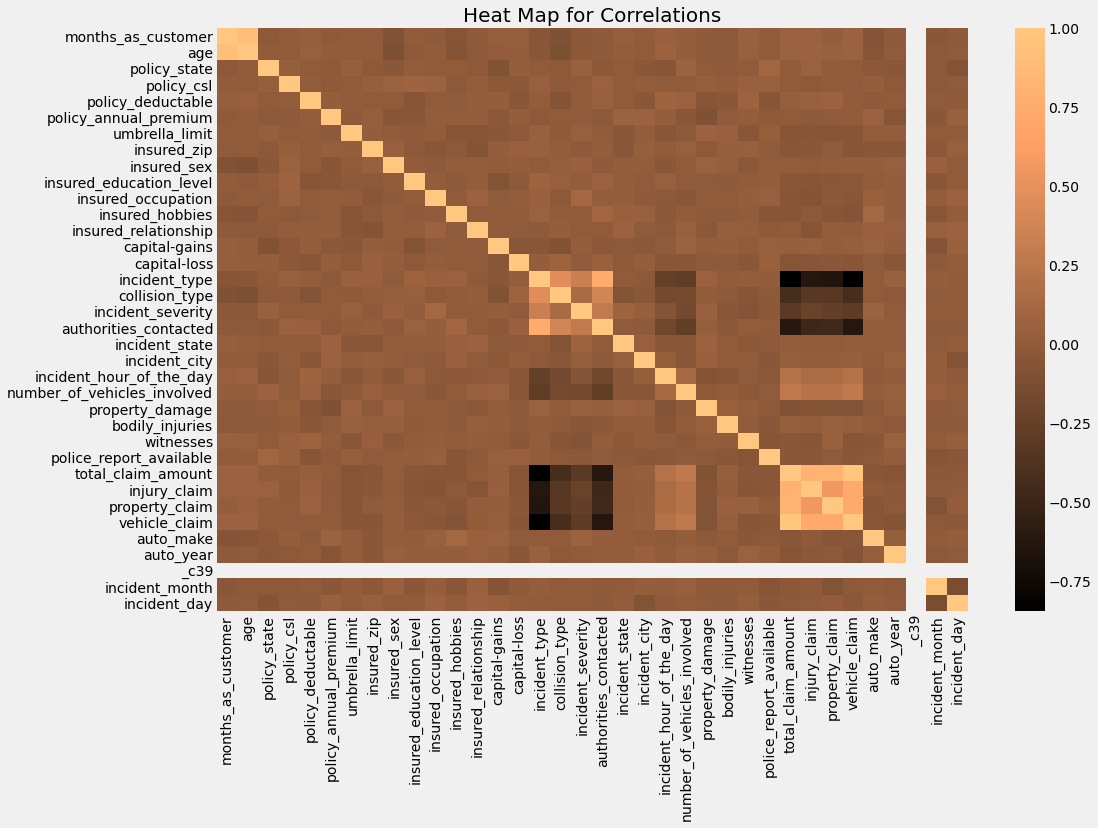

In [101]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(x_train.corr(), cmap = 'copper')
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

In [103]:
!pip install imblearn

Training Accuracy:  0.9
Testing Accuarcy:  0.83
              precision    recall  f1-score   support

           0       0.66      0.82      0.73        57
           1       0.92      0.83      0.88       143

    accuracy                           0.83       200
   macro avg       0.79      0.83      0.80       200
weighted avg       0.85      0.83      0.83       200



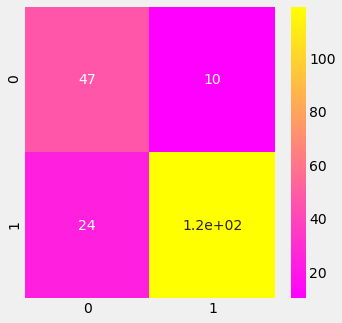

In [115]:
# Random Forest Classifier

from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 

model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)

model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()

Training Accuracy:  0.855
Testing Accuarcy:  0.82
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        57
           1       0.91      0.83      0.87       143

    accuracy                           0.82       200
   macro avg       0.78      0.81      0.79       200
weighted avg       0.84      0.82      0.82       200



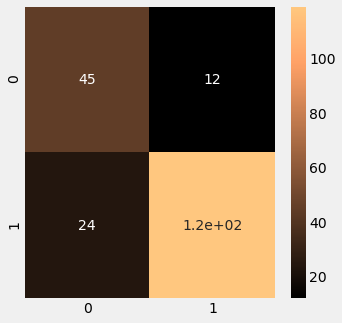

In [116]:
# Easy Ensemble Classifier

from imblearn.ensemble import EasyEnsembleClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 

model1 = EasyEnsembleClassifier(n_estimators = 100, random_state = 0)

model1.fit(x_train, y_train)
y_pred_ef = model1.predict(x_test)

print("Training Accuracy: ", model1.score(x_train, y_train))
print('Testing Accuarcy: ', model1.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_ef)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred_ef)
sns.heatmap(cm, annot = True, cmap = 'copper')
plt.show()

Training Accuracy:  0.94
Testing Accuarcy:  0.845
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        57
           1       0.91      0.87      0.89       143

    accuracy                           0.84       200
   macro avg       0.81      0.83      0.82       200
weighted avg       0.85      0.84      0.85       200



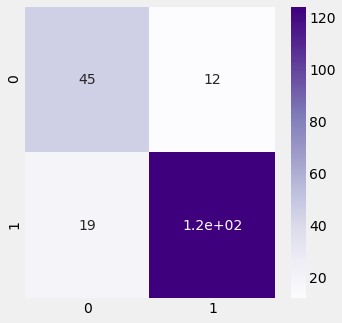

In [117]:
# Random Forest with Bagging Classifier

from imblearn.ensemble import BalancedBaggingClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
                 

model2 = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(),
                                 sampling_strategy = 'auto',
                                 replacement = False,
                                 random_state = 0)

model2.fit(x_train, y_train)
y_pred_bc = model2.predict(x_test)

print("Training Accuracy: ", model2.score(x_train, y_train))
print('Testing Accuarcy: ', model2.score(x_test, y_test))
# making a classification report
cr = classification_report(y_test,  y_pred_bc)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred_bc)
sns.heatmap(cm, annot = True, cmap = 'Purples')
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.81      0.74        57
           1       0.92      0.85      0.88       143

    accuracy                           0.84       200
   macro avg       0.80      0.83      0.81       200
weighted avg       0.85      0.84      0.84       200



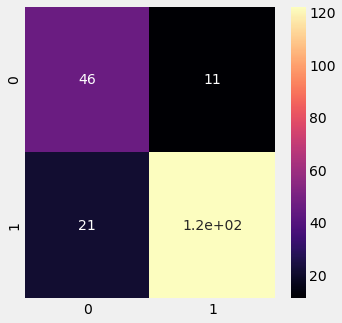

In [118]:
from sklearn.ensemble import VotingClassifier

vote_est = [ 
    ('brf', BalancedRandomForestClassifier()),
    ('bc', BalancedBaggingClassifier()),
    ('eec',EasyEnsembleClassifier())]

voting = VotingClassifier(estimators = vote_est , voting = 'soft')
voting.fit(x_train, y_train)

y_pred = voting.predict(x_test).astype(int)

# making a classification report
cr = classification_report(y_test,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'magma')
plt.show()

In [119]:
y.value_counts()

1    753
0    247
Name: fraud_reported, dtype: int64

In [120]:
frauds = np.array(data[data['fraud_reported'] == 0].index)
no_frauds = len(frauds)

print(no_frauds)

247


In [121]:
normal_indices = data[data['fraud_reported'] == 1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

753


In [122]:
random_normal_indices = np.random.choice(no_normal_indices, size = no_frauds, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

247


In [123]:
under_sample = np.concatenate([frauds, random_normal_indices])
print(len(under_sample))

494


In [124]:
# creating the undersample data

undersample_data = data.iloc[under_sample, :]

In [125]:
# splitting the undersample dataset into x and y sets

x_u = undersample_data.iloc[:, undersample_data.columns != 'fraud_reported'] 
y_u = undersample_data.iloc[:, undersample_data.columns == 'fraud_reported']

print(x_u.shape)
print(y_u.shape)

(494, 36)
(494, 1)


In [130]:
x_u['_c39'] = x_u.drop(['_c39'],axis=1)

In [131]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_u, y_u, test_size = 0.2, random_state = 0)

In [132]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)

In [133]:
x_train1

array([[ 0.44545992,  0.68279322, -0.84246979, ...,  0.44545992,
        -0.98572492, -0.81837591],
       [-0.5435743 , -0.24579511, -0.45597087, ..., -0.5435743 ,
        -0.98572492,  1.79496156],
       [ 0.55350568,  0.37326378, -0.84246979, ...,  0.55350568,
        -0.98572492,  0.20423441],
       ...,
       [ 0.35403659,  0.47644026, -0.84246979, ...,  0.35403659,
         0.90437869, -1.15924601],
       [ 1.35138202,  1.09549915, -0.84246979, ...,  1.35138202,
         0.90437869, -0.36388243],
       [ 0.83608688,  0.78596971, -0.45597087, ...,  0.83608688,
         0.90437869, -0.93199927]])

Training Accuracy:  1.0
Testing Accuarcy:  0.7878787878787878


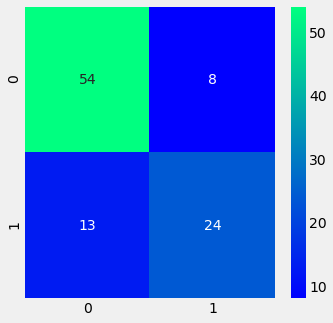

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        62
           1       0.75      0.65      0.70        37

    accuracy                           0.79        99
   macro avg       0.78      0.76      0.77        99
weighted avg       0.79      0.79      0.78        99



In [134]:
from sklearn.ensemble import RandomForestClassifier

model_u = RandomForestClassifier()
model_u.fit(x_train1, y_train1)

y_pred = model_u.predict(x_test1)

print("Training Accuracy: ", model_u.score(x_train1, y_train1))
print('Testing Accuarcy: ', model_u.score(x_test1, y_test1))

# confusion matrix
cm = confusion_matrix(y_test1, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()

# classification report
cr = classification_report(y_test1, y_pred)
print(cr)

In [140]:

x['_c39'] = x.drop(['_c39'],axis=1)

In [141]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_resample, y_resample  = oversample.fit_resample(x, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(1506, 36)
(1506,)


In [142]:

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

In [143]:
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

Training Accuracy:  1.0
Testing Accuarcy:  0.8841059602649006


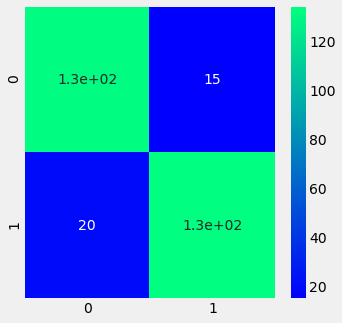

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       148
           1       0.90      0.87      0.88       154

    accuracy                           0.88       302
   macro avg       0.88      0.88      0.88       302
weighted avg       0.88      0.88      0.88       302



In [144]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_o = RandomForestClassifier()
model_o.fit(x_train2, y_train2)

y_pred = model_o.predict(x_test2)

print("Training Accuracy: ", model_o.score(x_train2, y_train2))
print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))

# confusion matrix
cm = confusion_matrix(y_test2, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()

# classification report
cr = classification_report(y_test2, y_pred)
print(cr)

In [145]:
import pickle
# Creating a pickle file for the classifier
filename = 'RF-model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [146]:
filename = 'Easy-ensemble-model.pkl'
pickle.dump(model1, open(filename, 'wb'))

In [147]:
filename = 'Balanaced-bagging-model.pkl'
pickle.dump(model2, open(filename, 'wb'))

In [148]:
filename = 'Voting-classifier-model.pkl'
pickle.dump(voting, open(filename, 'wb'))

In [149]:
filename = 'Random-forest-classifier-model.pkl'
pickle.dump(model_u, open(filename, 'wb'))

In [150]:
filename = 'Random-forest-classifier-model-o.pkl'
pickle.dump(model_o, open(filename, 'wb'))